In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(720, 1080, 3)


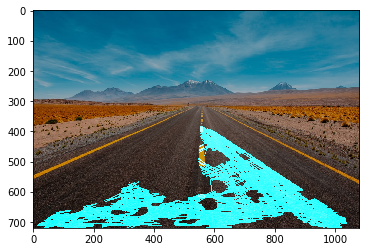

In [61]:
image = cv2.imread('road.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height)
]

def region_of_interest(image, vertices):
    # defining blank matrices width and height are equal to the image shape
    mask = np.zeros_like(image)
    # Retrieve the number of color channels from the image
    #channel_count = image.shape[2] # for gray_scale image it is not required
    # Create a match color with the same color channel count
    #match_mask_color = (255,) * channel_count
    # For gray_scale image
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    # return the image only where the mask pixel matches
    mask_image = cv2.bitwise_and(image, mask)
    return mask_image


gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blur_image = cv2.GaussianBlur(gray_image, (3,3), 0)
canny_image = cv2.Canny(blur_image, 0, 250)

cropped_image = region_of_interest(canny_image, np.array([region_of_interest_vertices], np.int32))


# Next Step is to draw lines on this edges using HoughLine Transform
lines = cv2.HoughLinesP(cropped_image, rho=6, theta=np.pi/60, threshold=160, 
                        lines = np.array([]), minLineLength=40, maxLineGap=25)

def draw_lines(image, lines):
    image = np.copy(image)
    # Creating the empty image (same image of the original image)
    blank_image = np.zeros((image.shape[0], image.shape[1], 3), dtype = np.uint8)
    
    # Loop around these lines vectors and we are going to draw the lines
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1, y1), (x2, y2), (0, 255, 255), 2)
    
    # 0.8 and 1 are the weights are images to join both images
    image = cv2.addWeighted(image, 0.8, blank_image, 1, 0.0)
    return image
            
image_with_lines = draw_lines(image, lines)
plt.imshow(image_with_lines)
plt.show()

In [62]:
# For video

In [64]:
import matplotlib.pylab as plt
import cv2
import numpy as np

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

# = cv2.imread('road.jpg')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
def process(image):
    print(image.shape)
    height = image.shape[0]
    width = image.shape[1]
    region_of_interest_vertices = [
        (0, height),
        (width/2, height/2),
        (width, height)
    ]
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    canny_image = cv2.Canny(gray_image, 100, 120)
    cropped_image = region_of_interest(canny_image,
                    np.array([region_of_interest_vertices], np.int32),)
    lines = cv2.HoughLinesP(cropped_image,
                            rho=2,
                            theta=np.pi/180,
                            threshold=50,
                            lines=np.array([]),
                            minLineLength=40,
                            maxLineGap=100)
    image_with_lines = drow_the_lines(image, lines)
    return image_with_lines

cap = cv2.VideoCapture('test.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    frame = process(frame)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
